# Exemplo 2: MNIST ConvNet

**Nível de dificuldade:** <font color=Orange>médio</font>

# Importando as bibliotecas necessárias

Para o exemplo em questão, serão utilizadas as seguintes bibliotecas:

- [Matplotlib](https://matplotlib.org/stable/index.html#installation)
- [Numpy](https://numpy.org/install/)
- [Tensorflow](https://www.tensorflow.org/install)


```{tip}
Acesse os links listados acima, para maiores informações de como instalar as bibliotecas que serão utilizadas.
```

## Quickstart

Você também pode utilizar o comando abaixo, para instalar ambas bibliotecas necessárias.

```bash
$ pip install numpy tensorflow matplotlib
```

```{attention}
O código acima não irá instalar os pacotes, caso alguma versão deles já exista no seu environment. Dependendo de qual for essa versão, isso pode vir a ser um problema. Para solucionar o problema, você poderia realizar um update dos pacotes (ver código abaixo), no entanto fazer isso pode causar problemas para outras bibliotecas instaladas no seu environment, que necessitem das versões instaladas atualmente. Por isso, <b><font color=red>eu recomendo fortemente que você crie um environment separado para esta demo, antes de executar o comando.</font></b>
```

```bash
$ pip install --upgrade numpy tensorflow matplotlib
```

## Criando um environment para a demo

As instruções abaixo mostram o passo-a-passo de como criar um environment novo usando o [Anaconda](https://anaconda.cloud/installers).

<b>Passo 1:</b> Criando o novo environment

Abra uma janela da linha de comando e, execute o seguinte comando:

```bash
$ conda create -N demo-pyimg -y python==3.9
```

O comando irá criar um novo environment chamado **demo-pyimg**, utilizando a versão 3.9 do Python.
Você pode alterar o nome do environment, para o nome que você quiser. Quanto à versão do python, 
eu recomendo utilizar uma das seguintes versões: 3.8, 3.9, ou 3.10.

<b>Passo 2:</b> Ativando o novo environment

Para ativar o environment criado, execute o seguinte comando:

```bash
$ conda activate demo-pyimg
```

:::{note}
Você também pode ver uma lista de environments disponíveis, utilizando o comando abaixo:

```{code-block} bash
---
lineno-start: 1
emphasize-lines: 1
caption: List conda environments
---
$ conda env list
```

No meu caso, o comando acima retorna a seguinte lista:

```{code-block} bash
$ conda env list

# conda environments:
                         /Users/erikingwersen/opt/anaconda3
base                     /opt/anaconda3
DinoRunMl                /opt/anaconda3/envs/DinoRunMl
FEM                      /opt/anaconda3/envs/FEM
dataops                  /opt/anaconda3/envs/dataops
demo                     /opt/anaconda3/envs/demo
django-dashboard         /opt/anaconda3/envs/django-dashboard
foobar                   /opt/anaconda3/envs/foobar
ge_tutorials             /opt/anaconda3/envs/ge_tutorials
gpt3-demos               /opt/anaconda3/envs/gpt3-demos
nni                      /opt/anaconda3/envs/nni
pandas-dev               /opt/anaconda3/envs/pandas-dev
phoneix                  /opt/anaconda3/envs/phoneix
py10                     /opt/anaconda3/envs/py10
pyml                  *  /opt/anaconda3/envs/pyml
sparky                   /opt/anaconda3/envs/sparky
testml                   /opt/anaconda3/envs/testml
tf-metal                 /opt/anaconda3/envs/tf-metal
workspace                /opt/anaconda3/envs/workspace
```

:::

In [1]:
!pip install numpy tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


## Pacotes Opcionais

Pacotes opcionais para execução do código da seção: [Arquitetura do modelo (Opcional)](#arq-modelo)

In [ ]:
!pip install graphviz pydot

## Importando pacotes necessários

In [3]:
from __future__ import annotations
from typing import List, Any, Tuple, Iterable
import random
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Obtendo os dados do problema

A próxima linha de código realiza o download dos dados a serem utilizados.
A base será salva dentro do diretório `data/MNIST`.

:::{note}
As bases serão baixadas apenas uma vez. Execuções subsequentes carregarão o arquivo salvo em: `data/MNIST/mnist.npz`.
:::

**Fonte dos dados:** [MNIST homepage](http://yann.lecun.com/exdb/mnist/)

**Função:** keras.datasets.mnist.load_data(path='mnist.npz')

**Descrição:** Baixa e carrega o dataset MNIST.

**Retorna:** tupla de tuplas de arrays [NumPy](https://numpy.org/doc/stable/user/quickstart.html), com os seguintes objetos: `(x_train, y_train), (x_test, y_test)`. Onde:


- `x_train (np.ndarray[60000, 28, 28])`: 60.000 arrays de tamanho 28x28, representando o conjunto de imagens a serem utilizadas para treino do modelo.
- `y_train (np.ndarray[60000])`: 60.000 labels, com valores entre 0 e 9, representando cada um dos dígitos de `x_train`.
- `x_test (np.ndarray[10000, 28, 28])`: 10.000 arrays de tamanho 28x28, representando o conjunto de imagens a serem utilizadas para teste do modelo.
- `y_test (np.ndarray[10000])`: 10.000 labels, com valores entre 0 e 9, representando cada um dos dígitos de `x_test`.

In [4]:
data_dir = Path.cwd().joinpath(r'data/MNIST')
data_dir.mkdir(parents=True, exist_ok=True)
mnist_fpath = data_dir.joinpath('mnist').with_suffix('.npz')

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path=str(mnist_fpath))

## Visualizando os dados

Visualizando os dados do problema.

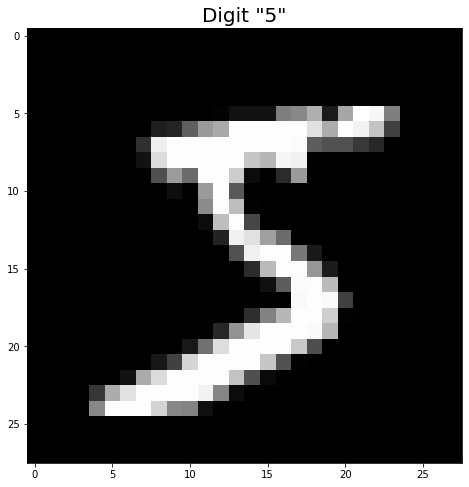

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Digit \"{y_train[0]}\"', fontsize=20)
plt.show()

## Refatorando...

Criando a função `plot_imgs`, para ajudar na visualização das imagens.

In [4]:
def plot_imgs(
    imgs: List[np.ndarray],
    labels: List[Any] | None = None,
    cols: int = 5,
    figsize: Tuple[int, int] | None = None, 
    maxsize: int = 30,
    cmap: str = 'gray',
) -> None:
    """Plot an array of images. 
    
    Parameters
    ----------
    imgs: List[np.ndarray]
        List of images.
    labels: List[Any] | None, optional
        List of labels for each image. If no label is specified,
        then each figure is plotted without label.
    cols: int, optional
        Number of columns to plot. Defaults to 5.
    figsize: Tuple[int, int], optional
        Figure size. If no value specified, then function
        uses `figsize = (12, 3 * rows)`.
    maxsize: int, optional
        Maximum number of images to plot.
    cmap: str, optional
        Colormap of each plot. Defaults to "gray".
    """
    if imgs.ndim == 2:
        imgs = [imgs]

    num_imgs = len(imgs)
    maxsize = min(num_imgs, maxsize)
    rows = int(np.ceil(maxsize/cols))
    cols = min(cols, num_imgs)

    if figsize is None:
        figsize = (12, 3 * rows)
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    current_col = 0
    current_row = -1
    
    for i, img in enumerate(imgs[:maxsize]):
        
        _current_col = i // cols
        
        if current_col != _current_col:
            current_row = 0
            current_col += 1
        else:
            current_row += 1
        if rows <= 1:
            ax = axes[current_row] 
        else:
            ax = axes[current_col, current_row]
        
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
        
        if labels is not None and len(labels) >= i + 1:
            ax.set_title(labels[i], fontsize=int(252/max(14, len(str(labels[i])))))

    plt.show()

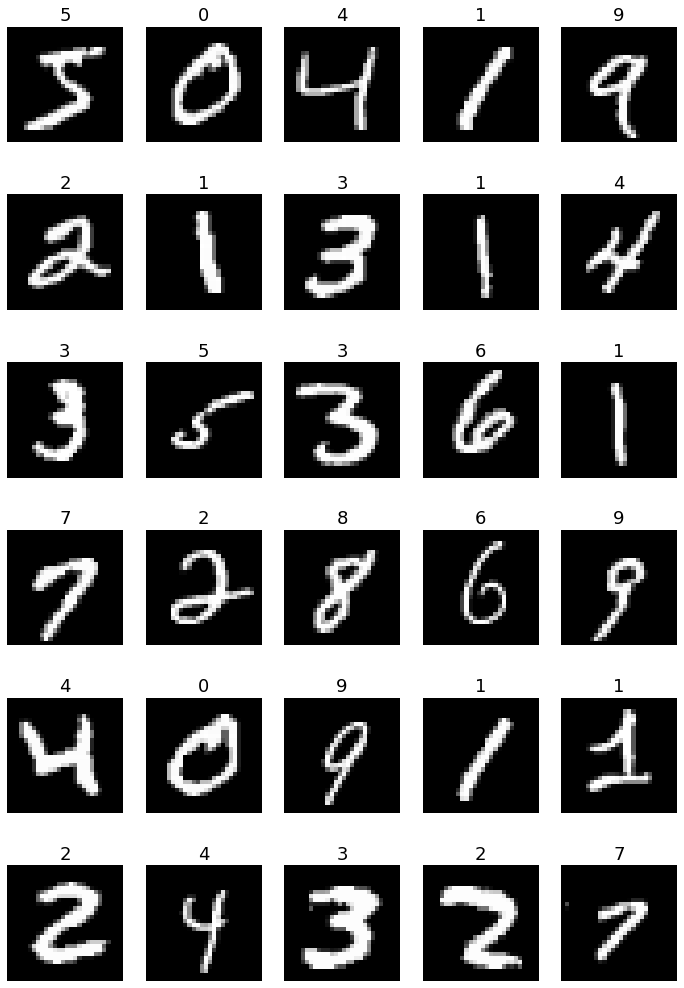

In [20]:
plot_imgs(x_train, y_train)

# Normalizando os dados

## Normalizando as imagens

Como as imagens já vem pré-processadas, o único tratamento que iremos aplicar é uma normalização dos píxels de cada imagem.
Cada píxel possui um valor que varia de 0 à 255. Iremos converte-los em valores entre 0 e 1. 
Existem diversos métodos de normalização que podemos aplicar para normalizar dados (tanto para imagens quanto dados tabulares).
O método escolhido para o problema chama-se **min-max scaler** que utiliza a seguinte fórmula:

$$X_{scaled}^{min-max} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Onde:

$X\,\,\rightarrow{}$ Cada píxel de cada imagem.

$X_{min}\,\,\rightarrow{}$ Píxel com o **menor** valor (0 no nosso caso).

$X_{max}\,\,\rightarrow{}$ Píxel com o **maior** valor (255 no nosso caso).


In [239]:
max_pixel = x_train.max()  # 255

# Convertendo pixels para valores entre 0 e 1.
x_train_norm = x_train.astype("float32") / max_pixel
x_test_norm = x_test.astype("float32") / max_pixel


In [241]:
# Convertendo dimensão das imagens para: (28, 28, 1)
x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

print(f"x_train shape: \033[94m\033[1m{x_train_norm.shape}\033[0m")
print(f"Quantidade de imagens a serem utilizadas durante o treino: \033[94m\033[1m{x_train_norm.shape[0]:,} imagens\033[0m")
print(f"Quantidade de imagens a serem utilizadas durante o teste: \033[94m\033[1m{x_test_norm.shape[0]:,} imagens\033[0m")

x_train shape: (60000, 28, 28, 1)
Quantidade de imagens a serem utilizadas durante o treino: 60,000 imagens
Quantidade de imagens a serem utilizadas durante o teste: 10,000 imagens


## Normalizando as labels

Agora, precisamos converter cada um dos labels, em uma lista de binários.

Por exemplo, o label "5", será convertido em:

```

  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                     │
                     └── sexta posição, logo, 5.
```

**Demais labels:**


**Label 0:**
```
  0   1   2   3   4   5   6   7   8   9
[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
  │
  └── primeira posição, logo, 0.
```
**Label 1:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
     │
     └── segunda posição, logo, 1.
```
**Label 2:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
         │
         └── terceira posição, logo, 2.
```
**Label 3:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
             │
             └── quarta posição, logo, 3.
```
**Label 4:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                 │
                 └── quinta posição, logo, 4.
```
**Label 5:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                     │
                     └── sexta posição, logo, 5.
```
**Label 6:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                         │
                         └── sétima posição, logo, 6.
```
**Label 7:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                             │
                             └── oitava posição, logo, 7.
```
**Label 8:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                                 │
                                 └── nona posição, logo, 8.
```
**Label 9:**

```
  0   1   2   3   4   5   6   7   8   9
[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
                                     │
                                     └── décima posição, logo, 9.
```

### **Opção 1:** criando uma função própria para conversão

In [213]:
def label_binarizer(labels: Iterable):
    """
    Convert labels into lists of binary labels.
    
    Function performs the following actions:
    
    1. Retrieves set of unique labels, sorted.
    2. Determines number of unique labels that exist.
    3. Creates dictionary with each unique label's binarized translation.
    4. Applies translation to every label.
    
    Parameters
    ----------
    labels: Iterable
        List of labels to binarize.
        
    Returns
    -------
    Tuple[np.ndarray, dict]
        Numpy array with binarized labels as floats, and dictionary with translations.
    
    Examples
    --------
    For example, consider the following list of labels:
    
    .. code-block:: python
    
        >>> example_labels = [2, 3, 2, 2, 5]
        >>> binary_labels, translation_dict = label_binarizer(example_labels)
        >>> print(binary_labels)
        [[1. 0. 0.]
         [0. 1. 0.]
         [1. 0. 0.]
         [1. 0. 0.]
         [0. 0. 1.]]
        >>> print(translation_dict)
        {'2': [1, 0, 0], '3': [0, 1, 0], '5': [0, 0, 1]}

    Function accepts multiple kinds of iterables as input:
    
    .. code-block:: python
    
        >>> import numpy as np
        >>> example_labels = np.array([2, 3, 2, 2, 5])
        >>> print(label_binarizer(example_labels)[0])
        [[1. 0. 0.]
         [0. 1. 0.]
         [1. 0. 0.]
         [1. 0. 0.]
         [0. 0. 1.]]
    """
    
    unique_labels = sorted(set(labels))
    nunique_labels = len(unique_labels)
    
    labels_binarized = {
        label: [0]*nunique_labels
        for label in unique_labels
    }
    for idx, unique_label in enumerate(unique_labels):
        labels_binarized[unique_label][idx] = 1
    return np.array([labels_binarized[label] for label in labels]).astype('float32'), labels_binarized


### **Opção 2:** utilizando a função `keras.utils.to_categorical`

In [220]:
num_classes = len(set(y_train))      # 10 classes possíveis -> (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).

y_train_norm = keras.utils.to_categorical(y_train, num_classes)
y_test_norm = keras.utils.to_categorical(y_test, num_classes)


# Criando o modelo

Agora que temos o nosso input normalizado e, os labels processados, podemos criar o nosso modelo:

In [242]:
# input_shape = (*x_train[0].shape, 1) # 
input_shape = (28, 28, 1)# -> Tamanho de cada imagem, ou seja, (28 pixels por 28 pixels).

model = keras.Sequential(
    [
        keras.Input(shape=input_shape, name='Input_Layer'),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name='Conv2D_Layer_1'),
        layers.MaxPooling2D(pool_size=(2, 2), name='MaxPool2D_Layer_1'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name='Conv2D_Layer_2'),
        layers.MaxPooling2D(pool_size=(2, 2), name='MaxPool2D_Layer_2'),
        layers.Flatten(name='Flatten_Layer'),
        layers.Dropout(0.5, name='Dropout_50_percent'),
        layers.Dense(num_classes, activation="softmax", name='Target_Layer'),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_Layer_1 (Conv2D)     (None, 26, 26, 32)        320       
                                                                 
 MaxPool2D_Layer_1 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 Conv2D_Layer_2 (Conv2D)     (None, 11, 11, 64)        18496     
                                                                 
 MaxPool2D_Layer_2 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 Flatten_Layer (Flatten)     (None, 1600)              0         
                                                                 
 Dropout_50_percent (Dropout  (None, 1600)            

<a id='arq-modelo'></a>
## Arquitetura do modelo (Opcional)

O código abaixo cria uma representação do modelo criado e salva a imagem gerada com o nome `MNIST_EXEMPLO_01.png`, dentro da pasta `outputs/MNIST`.

**Observação:** a função `keras.utils.plot_model` requer duas bibliotecas adicionais: [graphviz](https://pypi.org/project/graphviz/) e [pydot](https://pypi.org/project/pydot/). Execute o commando abaixo para instalar as bibliotecas:

```bash
$ pip install graphviz pydot
```

In [2]:
!pip install graphviz pydot

Note: you may need to restart the kernel to use updated packages.


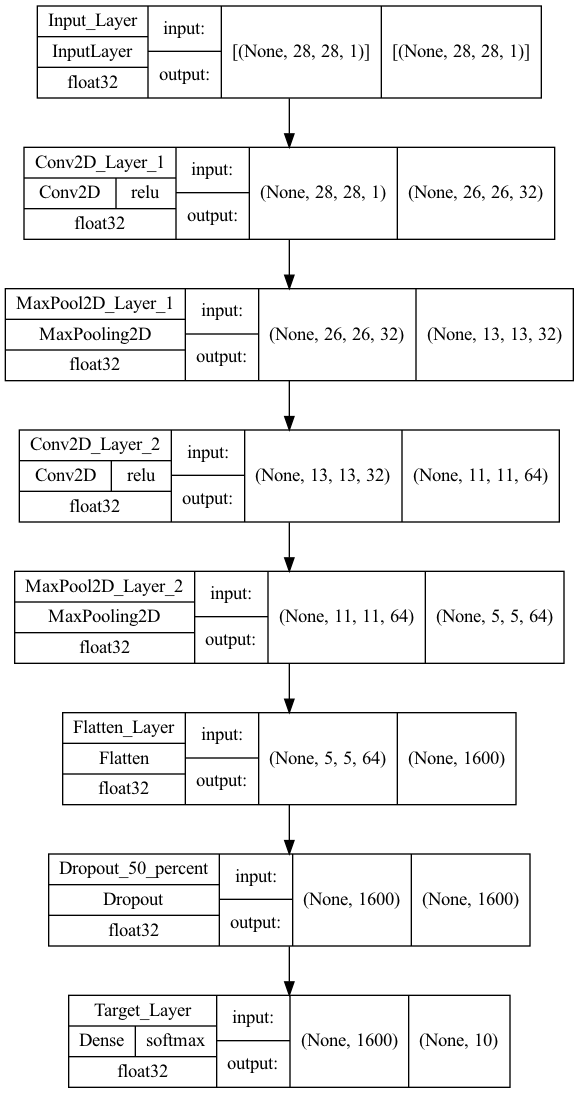

In [243]:
output_dir = Path.cwd().joinpath('outputs/MNIST')
output_dir.mkdir(parents=True, exist_ok=True)


keras.utils.plot_model(
    model,
    to_file=output_dir.joinpath("MNIST_EXEMPLO_02").with_suffix('.png'),
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    show_layer_activations=True,
)

# Treinando o modelo

Agora que construímos o nosso modelo, o único passo que resta é treiná-lo.

In [245]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train_norm, y_train_norm, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 10s 24ms/step - loss: 0.3618 - accuracy: 0.8916 - val_loss: 0.0828 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 9s 22ms/step - loss: 0.1120 - accuracy: 0.9660 - val_loss: 0.0554 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0825 - accuracy: 0.9746 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 11s 25ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0619 - accuracy: 0.9808 - val_loss: 0.0401 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 11s 27ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0359 - val_accuracy: 

# Avaliando o modelo

Agora que treinamos o nosso modelo, podemos avaliar a sua real acurácia, introduzindo dados nunca antes vistos pelo modelo.
Essa etapa é extremamente importante, para avaliarmos se o modelo durante o treino foi capaz de inferir as características que fazem
o dígito 5, ser 5, ou um 4, ser 4, etc.

In [248]:
score = model.evaluate(x_test_norm, y_test_norm, verbose=0)
print(f"Perdas durante o teste: {score[0]:.4f}")
print(f"Acurácia do teste: {score[1]:.2%}")

Perdas durante o teste: 0.0252
Acurácia do teste: 99.24%


## Criando função `predict_img`

A função `predict_img` utiliza o modelo treinado para prever uma imagem ou lista de imagens.
Ela também utiliza a função `plot_imgs` criada anteriormente para visualizar as imagens.

In [5]:
def predict_img(
    img: Iterable | np.ndarray, 
    real_label: Iterable | str | int | None = None,
    model: keras.engine.sequential.Sequential = None,
    plot_results: bool = True,
    **kwargs: Any,
):
    """
    Predict the label of an image or array of images.
    
    Function also normalizes images, if they're not normalized already.
    
    Parameters
    ----------
    img : Iterable | np.ndarray
        The image to predict.
    real_label : Iterable | str | int | None, optional
        The real label of the image.
        If not None, the predicted label will be displayed next to the real one.
    model : keras.engine.sequential.Sequential, optional
        The model used to predict the image.
        If None, a ValueError will be raised.
    plot_results: bool, default: True
        Whether to plot the image(s).
    **kwargs: Any
        Extra keyword arguments to configure `predict_img`.

    Returns
    -------
    preds : List[int]
        The predicted label, or labels of the image(s).

    Raises
    ------
    ValueError
        If the model is None.

    Examples
    --------
    You can use this function as follows:

    .. code-block:: python

        # predicts and plots the first five images from test dataset.
        predict_img(x_test[0:5], y_test[0:5], model)
        
        # predicts the first five images from test dataset.
        predict_img(x_test[0:5], y_test[0:5], model, plot_results=False)
        
        # predicts and plots the first five images from normalized test dataset.
        predict_img(x_test_norm[0:5], y_test[0:5], model)

    """
    if model is None:
        raise ValueError('You need to pass the trained model to the \"model\" argument')
    
    _img = img
    if not img.ndim == 4:
        img = img.reshape(-1, 28, 28, 1)
    
    sample_size = kwargs.get('sample_size', None)
    if isinstance(sample_size, int):
        take_samples = min(len(img), sample_size)
        if not take_samples == sample_size:
            print(
                f'The number of samples you\'re trying to plot ({sample_size}) is greater than the array of '
                f'examples you\'re trying to plot. Selecting {take_samples} samples instead.'
            )
        indexes = range(0, len(img)-1)
        random_indexes = random.sample(indexes, take_samples)
        img = np.array([img[index] for index in random_indexes])
        if isinstance(real_label, Iterable) and len(real_label) == len(img):
            real_label = [real_label[index] for index in random_indexes]
    
    if kwargs.get('normalize', False):
        img = img.astype('float32')/255
    _img = img
    if not img.ndim == 4:
        img = img.reshape(-1, 28, 28, 1)
    preds = [np.argmax(pred) for pred in model.predict(img)]
    if plot_results:
        if isinstance(real_label, Iterable) and len(real_label) == len(preds):
            labels_prefix = 'Real Label:'
            labels = [f'{real_lbl} / Pred: {pred}' for real_lbl, pred in zip(real_label, preds)]
        else:
            labels = preds
            labels_prefix = 'Predicted Label:'
        plot_imgs(_img, labels, labels_prefix)

    return preds

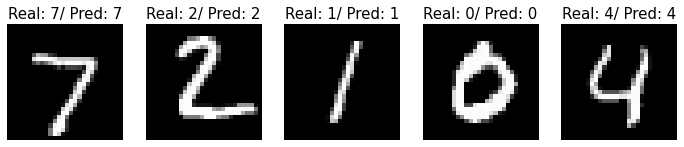

[7, 2, 1, 0, 4]

In [331]:
predict_img(x_test[0:5], y_test[0:5], model)

## Erros do modelo

In [332]:
predictions = predict_img(x_test, model=model, plot_results=False)

In [333]:
false_predictions = [
    idx for idx, (true_label, predicted_label) in enumerate(zip(y_test, predictions))
    if true_label != predicted_label
]
print(
    f'Modelo errou: {len(false_predictions):,} de {len(y_test):,} ({len(false_predictions)/len(y_test):.2%})'
)

Modelo errou: 76 de 10,000 (0.76%)


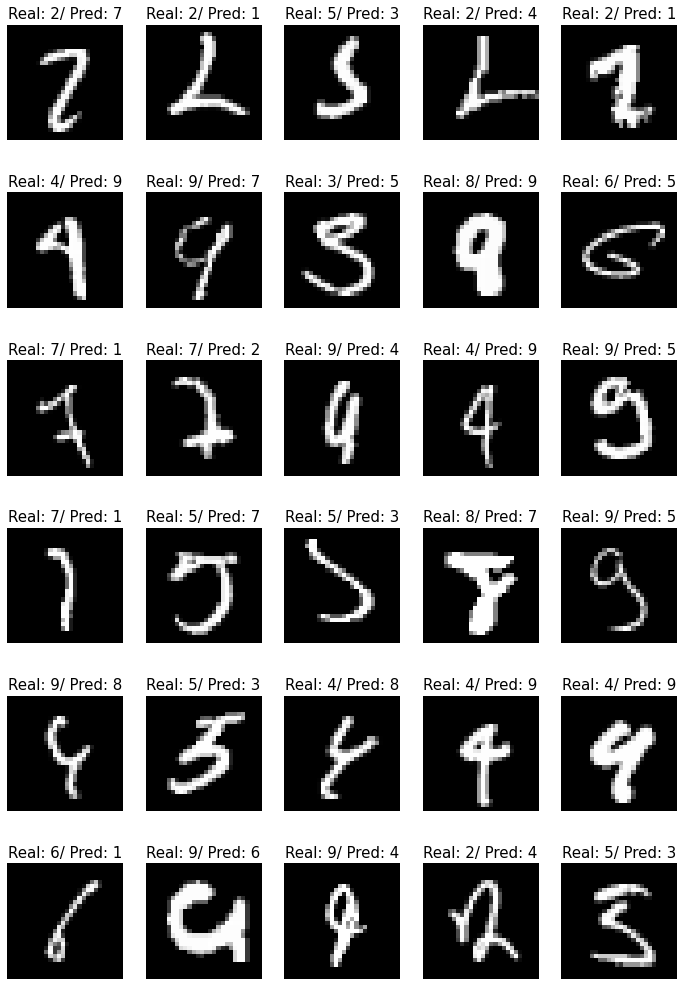

In [334]:
false_preds = predict_img(x_test_norm[false_predictions], y_test[false_predictions], model)

# Juntando todos os passos

O código abaixo reúne todos os passos descritos anteriormente em uma só classe `MnistPredict`.


**Observação:** a classe `MnistPredict` não é um bom exemplo de como juntar todas as partes. Se esse código prescisasse rodar em produção, o "ideal" seria converter o problema em funções responsáveis por:

- Carregar os dados.
- <b><font color=red>Verificar os dados carregados.</font></b>
- Normalizar as imagens.
- Binarizar as labels.
- Dividir os dados em grupos de treino/teste.
- Criar o modelo.

Com as funções acima criadas, criar uma classe "central", para controlar execução das funções listadas acima.

In [41]:
def create_model(
    input_shape: Tuple[int, int, int], 
    num_classes: int,
    print_summary: bool = False,
) -> keras.engine.sequential.Sequential:
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape, name='Input_Layer'),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name='Conv2D_Layer_1'),
            layers.MaxPooling2D(pool_size=(2, 2), name='MaxPool2D_Layer_1'),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name='Conv2D_Layer_2'),
            layers.MaxPooling2D(pool_size=(2, 2), name='MaxPool2D_Layer_2'),
            layers.Flatten(name='Flatten_Layer'),
            layers.Dropout(0.5, name='Dropout_50_percent'),
            layers.Dense(num_classes, activation="softmax", name='Target_Layer'),
        ]
    )
    if print_summary:
        print(model.summary())
    return model


class MnistPredict:
    
    _data_dir: Path = Path.cwd().joinpath(r'data/MNIST')
    _mnist_filename = 'mnist'
    x_train = None
    y_train = None
    x_test = None
    y_test = None
    
    _x_train_norm = None
    _x_test_norm = None
    
    _labels = None
    _model = None
    
    model_trained = False
    
    @property
    def data_dir(self) -> Path:
        _data_dir = Path(self._data_dir)
        _data_dir.mkdir(parents=True, exist_ok=True)
        return _data_dir
    
    @data_dir.setter
    def data_dir(self, data_dir: str | None = None):
        if data_dir is not None:
            self._data_dir = data_dir
    
    @property
    def mnist_path(self) -> Path:
        return self.data_dir.joinpath(self.mnist_filename).with_suffix('.npz')
    
    @property
    def mnist_filename(self) -> str:
        mnist_filename = self._mnist_filename
        if not isinstance(mnist_filename, str):
            raise ValueError(f'_mnist_filename should be a string, not {type(mnist_filename)}')
        return mnist_filename

    @mnist_filename.setter
    def mnist_filename(self, mnist_filename: str | None = None):
        if mnist_filename is not None:
            self._mnist_filename = mnist_filename
            
    @property
    def labels(self) -> set:
        if self.y_train is None and self.y_test is None:
            raise ValueError(
                'Load train/test images, executing method `load_data` before trying to build model.'
            )
        if self._labels is None:
            self._labels = set(self.y_train)
        return self._labels

    @property
    def num_labels(self) -> int:
        return len(self.labels)
    
    @property
    def model(self):
        if self._model is None:
            input_shape = (*self.x_train.shape[1:], 1)
            model = create_model(input_shape, self.num_labels)
            model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
            self._model = model
        return self._model
    
    @property
    def x_train_norm(self):
        if self._x_train_norm is None:
            self._x_train_norm = self.normalize_images(self.x_train)
        return self._x_train_norm
    
    @property
    def x_test_norm(self):
        if self._x_test_norm is None:
            self._x_test_norm = self.normalize_images(self.x_test)
        return self._x_test_norm
    
    def __init__(self, data_dir=None, mnist_filename=None):
        self.data_dir = data_dir
        self.mnist_filename = mnist_filename
        self.load_data()
    
    def load_data(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = keras.datasets.mnist.load_data(
            path=str(self.mnist_path)
        )
        
    def normalize_images(self, images: np.ndarray) -> np.ndarray:
        max_size = images.max()
        if max_size > 1:
            images = images.astype('float32')/255
        return images.reshape(-1, 28, 28, 1)
    
    def normalize_labels(self, labels) -> np.ndarray:
        if labels.max() > 1:
            return keras.utils.to_categorical(labels, self.num_labels)
        return labels

    def train(self, x_train = None, y_train = None, batch_size=128, epochs=15, validation_split=0.1):
        if x_train is None or y_train is None:
            x_train = self.x_train_norm
            y_train = self.y_train
        y_train = self.normalize_labels(y_train)
        self.model.fit(
            x_train, 
            y_train, 
            batch_size=batch_size,
            epochs=epochs, 
            validation_split=validation_split,
        )
        self.model_trained = True
    
    def evaluate(self, x_test = None, y_test = None):
        if not self.model_trained:
            raise ValueError(
                'Model is not trained. Please train model before calling `evaluate` method.'
            )
        if x_test is None or y_test is None:
            x_test = self.x_test_norm
            y_test = self.y_test
        y_test = self.normalize_labels(y_test)
        score = self.model.evaluate(x_test, y_test, verbose=0)
        
        print(f"Perdas durante o teste: \033[94m\033[1m{score[0]:.4f}\033[0m")
        print(f"Acurácia do teste:  \033[94m\033[1m{score[1]:.2%}\033[0m")


In [43]:
mnist_model = MnistPredict()
mnist_model.train()
mnist_model.evaluate()

Epoch 1/15
422/422 [==============================] - 12s 29ms/step - loss: 0.3723 - accuracy: 0.8850 - val_loss: 0.0828 - val_accuracy: 0.9773
Epoch 2/15
422/422 [==============================] - 13s 31ms/step - loss: 0.1161 - accuracy: 0.9647 - val_loss: 0.0598 - val_accuracy: 0.9825
Epoch 3/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0880 - accuracy: 0.9718 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 4/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0743 - accuracy: 0.9763 - val_loss: 0.0431 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0381 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 14s 32ms/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0382 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0363 - val_accuracy:

# Conclusão

O modelo criado foi capaz de aprender com alta acurácia, a reconhecer dígitos escritos à mão.


Como observado em [Erros do modelo](#Erros-do-modelo), as imagens que o nosso modelo não foi capaz de prever corretamente, seriam extremamente difíceis de serem classificadas até mesmo por um humano treinado. Isso porque, elas se assemelham bastante à outros dígitos. Sendo assim, podemos classificá-las como "outliers".